In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [ ]:
I Modèle avec variables de type Features

In [51]:
# Import des .pkl
X_train = pd.read_pickle("../data/X_train_n.pkl")
Y_train = pd.read_pickle("../data/Y_train_n.pkl")
X_test = pd.read_pickle("../data/X_test_n.pkl")
Y_test = pd.read_pickle("../data/Y_test_n.pkl")

In [ ]:
On n'a pas les v. dummy variables pour "hour" et "year"<br>
OK corrigé pour Origin

In [27]:
# Hyperparamètre de régularisation
# alpha = 0.01 to 100 ?

In [5]:
def estimate_ridge(alpha):
    rr = Ridge(alpha)
    rr.fit(X_train, Y_train)

    print(rr.get_params())

    train_score = rr.score(X_train, Y_train)
    test_score = rr.score(X_test, Y_test)

    # R2
    print ("Linear regression train score:", train_score)
    print ("Linear regression test score:", test_score)

    Y_train_prediction = rr.predict(X_train)
    Y_test_prediction = rr.predict(X_test)
    # ROOT MEAN SQUARED on train
    print ("Mean_squared_error for train:", mean_squared_error(Y_train, Y_train_prediction))
    # ROOT MEAN SQUARED on test
    print ("Mean_squared_error for test:", mean_squared_error(Y_test, Y_test_prediction))
    
    return None
estimate_ridge(0.01)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Linear regression train score: 0.959484462210167
Linear regression test score: 0.9071806127886678
Mean_squared_error for train: 1334.9492580246047
Mean_squared_error for test: 3014.2979112261073


In [ ]:
# ROOT MEAN SQUARED LOGARITHMIC ERROR : privilégier des prédictions au-dessous de la vérité
# à calculer ...

In [52]:
# Calcul des Y = log(Y + 1)
Y_train['log_count'] = Y_train['count'].map(lambda x: np.log1p(x))
Y_test['log_count'] = Y_test['count'].map(lambda x: np.log1p(x))
Y_train = Y_train.drop('count', axis = 1)
Y_test = Y_test.drop('count', axis = 1)

In [53]:
rr = Ridge(0.01)
# Cette fois avec la transformation Log !!!
rr.fit(X_train, Y_train)

print(rr.get_params())

train_score = rr.score(X_train, Y_train)
test_score = rr.score(X_test, Y_test)

# R2
print ("Linear regression train score:", train_score)
print ("Linear regression test score:", test_score)

Y_train_prediction = rr.predict(X_train)
Y_test_prediction = rr.predict(X_test)


# ROOT MEAN SQUARED on train
print ("Mean_squared_error for train:", mean_squared_error(Y_train, Y_train_prediction))
# ROOT MEAN SQUARED on test
print ("Mean_squared_error for test:", mean_squared_error(Y_test, Y_test_prediction))

# print ("Mean_squared_error for train:", mean_squared_error(np.log(Y_train + 1), Y_train_prediction))
# ROOT MEAN SQUARED on test
# print ("Mean_squared_error for test:", mean_squared_error(np.log(Y_test + 1), Y_test_prediction))


{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Linear regression train score: 0.9750966954897439
Linear regression test score: 0.9473365536352595
Mean_squared_error for train: 0.05009324865929096
Mean_squared_error for test: 0.10645128678290658


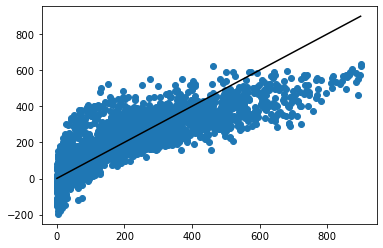

In [15]:
# ATTENTION : ancien plot
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(min(Y_test["count"]),max(Y_test["count"]))]
plt.plot(x,"k")
# OLD

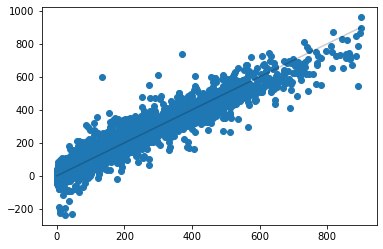

In [7]:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(min(Y_test["count"]),max(Y_test["count"]))]
plt.plot(x,"k",alpha=0.2)

In [68]:
int(max(Y_test["log_count"]))

6

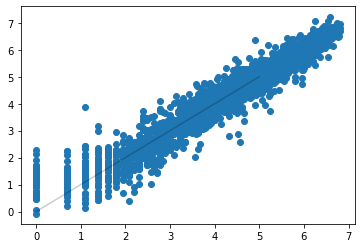

In [69]:
# Avec transformation Log:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(int(min(Y_test["log_count"])),int(max(Y_test["log_count"])))]
plt.plot(x,"k",alpha=0.2)

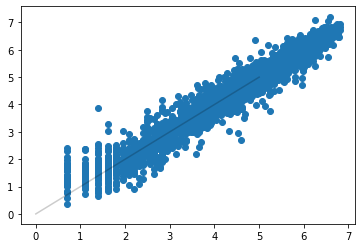

In [12]:
# Avec transformation Log + 1:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(int(min(Y_test["log_count"])),int(max(Y_test["log_count"])))]
plt.plot(x,"k",alpha=0.2)

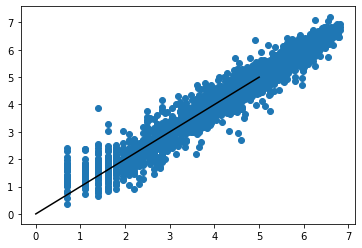

In [54]:
# Avec transformation Log + 1:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(int(min(Y_test["log_count"])),int(max(Y_test["log_count"])))]
plt.plot(x,"k")

On peut améliorer ce modèle en considérant le Log(Y)

In [6]:
import time

In [7]:
now = time.time()
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(X_train, Y_train)
end = time.time()
print (end-now)

KeyboardInterrupt: 

In [56]:
now = time.time()
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(X_train, Y_train)
end = time.time()
print (end-now)

940.8848881721497


Après transformation log + 1, on peut lancer ceci !

In [16]:
Y_train.head()

,log_count
8620,5.638355
8985,6.725034
6171,5.327876
6473,4.007333
10877,5.472271


In [124]:
#On mettait pas scoring <=> utiliser le R2
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid_neg_mean = GridSearchCV(model,parameters, cv=5, scoring = "neg_mean_squared_error")
grid_neg_mean.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.1, 0.5, 1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [57]:
# model = Ridge()
# parameters = {'alpha':[0.1,0.5,1,5]}
# grid = GridSearchCV(model,parameters, cv=5, scoring= "neg_mean_squared_log_error")
# grid.fit(X_train, Y_train)
# Avant sans transformation Log: 
# ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [37]:
grid.best_params_
# OLD : {'alpha': 0.1}
# OLD : {'alpha': 5}

{'alpha': 5}

In [43]:
grid.predict(X_test)

array([[5.60874129],
       [5.83534895],
       [5.53638238],
       ...,
       [4.17177703],
       [3.93403134],
       [5.09310317]])

In [19]:
grid.predict(X_test).shape

(3266, 1)

In [76]:
X_test.shape

(3266, 3912)

In [73]:
# OLD
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040302,0.009796,0.015572,0.005775,0.1,{'alpha': 0.1},0.408625,0.435554,0.368470,0.413126,0.418446,0.408844,0.022154,2
1,0.025101,0.007467,0.008556,0.002011,0.5,{'alpha': 0.5},0.408630,0.435504,0.368562,0.412998,0.418556,0.408850,0.022113,1
2,0.021172,0.001417,0.006845,0.000224,1,{'alpha': 1},0.408616,0.435418,0.368599,0.412850,0.418601,0.408817,0.022078,3
3,0.020471,0.000237,0.007229,0.000387,5,{'alpha': 5},0.408488,0.434866,0.368367,0.412095,0.418285,0.408420,0.021975,4


In [22]:
# NEW
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063601,0.009798,0.016519,0.007654,0.1,{'alpha': 0.1},0.695364,0.691930,0.691947,0.705021,0.707249,0.698302,0.006555,1
1,0.027166,0.000957,0.007704,0.001051,0.5,{'alpha': 0.5},0.695355,0.692009,0.691836,0.705030,0.707169,0.698280,0.006542,2
2,0.025861,0.000832,0.007228,0.000350,1,{'alpha': 1},0.695315,0.692049,0.691670,0.705007,0.707051,0.698218,0.006534,3
3,0.025729,0.001266,0.007655,0.001650,5,{'alpha': 5},0.694768,0.691915,0.690411,0.704410,0.706289,0.697559,0.006540,4


In [20]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.976443,0.777777,0.067092,0.000760,0.1,{'alpha': 0.1},0.910856,0.904322,0.910676,0.919341,0.913630,0.911765,0.004864,4
1,20.338630,1.998034,0.074894,0.009717,0.5,{'alpha': 0.5},0.914682,0.909642,0.915086,0.925060,0.919231,0.916740,0.005153,3
2,20.755371,2.236685,0.069936,0.004754,1,{'alpha': 1},0.916695,0.912185,0.917031,0.927756,0.922132,0.919160,0.005329,2
3,18.709452,0.739696,0.067896,0.000446,5,{'alpha': 5},0.920485,0.917341,0.921209,0.933997,0.928148,0.924236,0.006023,1


In [77]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.390017,1.182693,0.070138,0.001553,0.1,{'alpha': 0.1},0.942436,0.940298,0.940252,0.937445,0.942032,0.940493,0.001762,4
1,18.386863,0.729382,0.086267,0.019814,0.5,{'alpha': 0.5},0.945366,0.943676,0.943951,0.940333,0.946224,0.943910,0.002016,3
2,19.592837,2.544285,0.075212,0.009563,1,{'alpha': 1},0.946722,0.945296,0.945593,0.941876,0.948255,0.945548,0.002110,2
3,20.064529,2.405328,0.077193,0.007971,5,{'alpha': 5},0.950008,0.948259,0.948797,0.946204,0.952432,0.949140,0.002055,1


In [20]:
# avec R2
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.961308,0.638338,0.063393,0.002784,0.1,{'alpha': 0.1},0.947626,0.945451,0.946824,0.944838,0.947593,0.946466,0.001134,4
1,16.341863,2.860929,0.076006,0.010412,0.5,{'alpha': 0.5},0.950306,0.948671,0.949977,0.947588,0.951381,0.949584,0.001321,3
2,13.566596,1.332189,0.071380,0.004109,1,{'alpha': 1},0.951522,0.950166,0.951365,0.949022,0.953236,0.951062,0.001414,2
3,15.714012,2.665052,0.070658,0.001902,5,{'alpha': 5},0.954348,0.952752,0.953998,0.952906,0.956944,0.954190,0.001507,1


In [38]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,42.818964,2.067808,0.629196,0.114736,0.1,{'alpha': 0.1},0.910857,0.904324,0.910677,0.919341,0.913632,0.911767,0.004863,4
1,44.374376,2.288162,0.607947,0.069376,0.5,{'alpha': 0.5},0.914681,0.909644,0.915086,0.925059,0.919234,0.916741,0.005153,3
2,43.556500,1.291541,0.795494,0.151052,1,{'alpha': 1},0.916694,0.912186,0.917030,0.927756,0.922136,0.919160,0.005329,2
3,41.097510,0.192938,0.659253,0.005084,5,{'alpha': 5},0.920481,0.917343,0.921208,0.934002,0.928153,0.924237,0.006025,1


In [78]:
grid.scorer_

<function sklearn.metrics.scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [ ]:
Calcul de la RMLSE avec : grid.predict(X_test) vs Y_test

In [ ]:
racine de moyenne sur toutes les observations (log(predict + 1) - log(Y_test + 1))²

In [82]:
# for i in range(0,(grid.predict(X_test)).shape[0]):
    # if grid.predict(X_test)[i][0] < 0:
        # print ("Valeur négative pour", i)
        # print (grid.predict(X_test)[i][0])
# print ("Pas de v. nég")        

In [23]:
to_update_grid_pred = np.empty([3266, 1])
for i in range(0,(grid.predict(X_test)).shape[0]):
    if grid.predict(X_test)[i][0] < 0:
        to_update_grid_pred[i][0] = 0
    else:
        to_update_grid_pred[i][0] = grid.predict(X_test)[i][0]

In [89]:
# OLD : array([1.27170942]) avec Linear regression + Origin = 2900 ème
# np.sqrt(np.mean((np.log(to_update_grid_pred + 1) - np.log(Y_test.values + 1))**2, axis=0))
# OLD : array([1.12650361]) avec Linear regression + Origin = 2800 ème

# devient
# np.sqrt(np.mean((np.log(prediction + 1) - np.log(Y_test.values + 1))**2, axis=0))
# array([0.85377923]) avec Linear regression + New = 2680 ème

array([0.11973139])

In [58]:
Y_test.values

array([[5.50125821],
       [5.48063892],
       [5.43807931],
       ...,
       [4.31748811],
       [4.14313473],
       [5.15329159]])

In [59]:
predicted_values = np.exp(grid.predict(X_test)) - 1

In [60]:
predicted_values.shape

(3266, 1)

In [61]:
grid.predict(X_test)

array([[5.60895904],
       [5.83439616],
       [5.53384378],
       ...,
       [4.17260751],
       [3.93571171],
       [5.09422686]])

In [66]:
# sur le train
RMLSE = np.sqrt(np.mean((grid.predict(X_train) - Y_train.values)**2, axis=0))
# RMLSE = array([0.23345401])  avant avec "neg_mean_squared_error"
# RMLSE = array([0.23345385]) avec R2

array([0.23345385])

In [63]:
# Sur le test
# RMLSE = np.sqrt(np.mean((np.log(predicted_values + 1) - np.log(Y_test.values + 1))**2, axis=0))
# RMLSE = np.sqrt(np.mean((np.log(np.exp(grid.predict(X_test))) - np.log(np.exp(Y_test.values) -1 + 1))**2, axis=0))
# RMLSE = np.sqrt(np.mean((np.log(np.exp(grid.predict(X_test))) - np.log(np.exp(Y_test.values)))**2, axis=0))
RMLSE = np.sqrt(np.mean((grid.predict(X_test) - Y_test.values)**2, axis=0))

# avant avec "neg_mean_squared_error"
# RMLSE = array([0.31071306]) !!!!
# RMLSE = array([0.31073213]) avec le R2

# submission avec score obtenu avec R2 

array([0.31073213])

In [39]:
rr = Ridge(5)
# Cette fois avec la transformation Log !!!
rr.fit(X_train, Y_train)

print(rr.get_params())

train_score = rr.score(X_train, Y_train)
test_score = rr.score(X_test, Y_test)

# R2
print ("Linear regression train score:", train_score)
print ("Linear regression test score:", test_score)

Y_train_prediction = rr.predict(X_train)
Y_test_prediction = rr.predict(X_test)


# ROOT MEAN SQUARED on train
print ("Mean_squared_error for train:", mean_squared_error(Y_train, Y_train_prediction))
# ROOT MEAN SQUARED on test
print ("Mean_squared_error for test:", mean_squared_error(Y_test, Y_test_prediction))

{'alpha': 5, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2'

Linear regression train score: 0.955699264006673
Linear regression test score: 0.9165578035131149
Mean_squared_error for train: 729.8785634592219
Mean_squared_error for test: 1354.9717446106247


In [ ]:
{'alpha': 5, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Linear regression train score: 0.9729055417069404
Linear regression test score: 0.9522385652759616
Mean_squared_error for train: 0.05450077663404289
Mean_squared_error for test: 0.09654260280952182

In [ ]:
SOUMETTRE A KAGGLE !!!!

In [113]:
df_to_predict = pd.read_pickle("../data/X_test_kaggle.pkl") 

In [114]:
df_to_predict.shape

(6493, 6431)

On applique maintenant : 

In [77]:
# diff = [x for x in set(list(df_to_predict)) if x not in set(list(X_test))]
# diff

In [117]:
df_to_predict.head()

,datetime,NO_temp,NO_atemp,NO_humidity,NO_windspeed,NN_soleil,NN_tendance_1,NN_tendance_2,CN_school_0,CN_school_1,...,"CO_windspeedQ_+_CO_year_(7,11]_2012","CO_windspeedQ_+_CO_year_(7,13]_2011","CO_windspeedQ_+_CO_year_(7,13]_2012","CO_windspeedQ_+_CO_year_[0,7]_2011","CO_windspeedQ_+_CO_year_[0,7]_2012",CO_workingday_+_CO_year_0_2011,CO_workingday_+_CO_year_0_2012,CO_workingday_+_CO_year_1_2011,CO_workingday_+_CO_year_1_2012,day
0,2011-01-20 00:00:00,10.66,11.365,56,26.0027,-64.731114,0.920373,19,1,0,...,0,0,0,0,0,0,0,1,0,20
1,2011-01-20 01:00:00,10.66,13.635,56,0.0000,-70.858731,0.920373,19,1,0,...,0,0,0,1,0,0,0,1,0,20
2,2011-01-20 02:00:00,10.66,13.635,56,0.0000,-69.313963,0.920373,19,1,0,...,0,0,0,1,0,0,0,1,0,20
3,2011-01-20 03:00:00,10.66,12.880,56,11.0014,-61.327846,0.920373,19,1,0,...,0,0,0,0,0,0,0,1,0,20
4,2011-01-20 04:00:00,10.66,12.880,56,11.0014,-50.733442,0.920373,19,1,0,...,0,0,0,0,0,0,0,1,0,20


Ajout de la prédiction au dataframe "df_to_predict"

In [118]:
df_temp = df_to_predict.drop("datetime", axis = 1)

In [119]:
df_to_predict["count"] = list((np.exp(grid.predict(df_temp)) - 1)[:,0])

In [120]:
df_to_predict[["datetime", "count"]].to_csv("../data/submission_to_send/pred_linear_ridge_regression.csv", index= False)

Linear regression + New : ON N'A PAS FAIT les features polynomiaux sur les var numériques